In [1]:
import os
import time

from tp1.manejo_archivos_analisis import leer_archivo_analisis
from tp1.tiempo_optimo import tiempo_optimo

directorio = 'data/'  
archivos = os.listdir(directorio)
archivos = sorted(archivos, key=lambda archivo: int(archivo.split(' ')[0]))
resultado = []


for archivo in archivos:
    print("Trabajando con archivo: " + archivo)
    tiempos_analisis = leer_archivo_analisis(directorio + archivo)
    
    tiempo_inicio = time.perf_counter()
    tiempo_optimo(tiempos_analisis)
    tiempo_fin = time.perf_counter()

    
    tiempo_ejecucion = (tiempo_fin - tiempo_inicio) * 1000
    medicion = (len(tiempos_analisis), round(tiempo_ejecucion, 2))
    print(f"N={medicion[0]} T={medicion[1]} ms")
    resultado.append(medicion)
    #time.sleep(0.2) # Ayuda a evitar outliers

print(resultado)

Trabajando con archivo: 8000 elementos.txt
N=8000 T=1.91 ms
Trabajando con archivo: 16000 elementos.txt
N=16000 T=4.07 ms
Trabajando con archivo: 24000 elementos.txt
N=24000 T=6.36 ms
Trabajando con archivo: 32000 elementos.txt
N=32000 T=8.34 ms
Trabajando con archivo: 40000 elementos.txt
N=40000 T=10.93 ms
Trabajando con archivo: 48000 elementos.txt
N=48000 T=13.09 ms
Trabajando con archivo: 56000 elementos.txt
N=56000 T=15.85 ms
Trabajando con archivo: 64000 elementos.txt
N=64000 T=18.61 ms
Trabajando con archivo: 72000 elementos.txt
N=72000 T=21.99 ms
Trabajando con archivo: 80000 elementos.txt
N=80000 T=24.05 ms
Trabajando con archivo: 88000 elementos.txt
N=88000 T=27.5 ms
Trabajando con archivo: 96000 elementos.txt
N=96000 T=31.11 ms
Trabajando con archivo: 104000 elementos.txt
N=104000 T=34.37 ms
Trabajando con archivo: 112000 elementos.txt
N=112000 T=37.8 ms
Trabajando con archivo: 120000 elementos.txt
N=120000 T=40.65 ms
Trabajando con archivo: 128000 elementos.txt
N=128000 T=4

In [2]:
for i in range(1, len(resultado) -1):
    medida_anterior = resultado[i-1][1]
    medida = resultado[i][1]
    medida_siguiente = resultado[i+1][1]

    if medida >= medida_siguiente:
        medida_aproximada = (medida_anterior + medida_siguiente)/2
        resultado[i] = (resultado[i][0], round(medida_aproximada, 2))
        print(f"Aproximando resultado {resultado[i][0]}, {medida} a {medida_aproximada} por ser outlier")
print(resultado)

Aproximando resultado 304000, 134.83 a 131.075 por ser outlier
Aproximando resultado 336000, 151.5 a 145.575 por ser outlier
Aproximando resultado 376000, 174.83 a 167.91500000000002 por ser outlier
[(8000, 1.91), (16000, 4.07), (24000, 6.36), (32000, 8.34), (40000, 10.93), (48000, 13.09), (56000, 15.85), (64000, 18.61), (72000, 21.99), (80000, 24.05), (88000, 27.5), (96000, 31.11), (104000, 34.37), (112000, 37.8), (120000, 40.65), (128000, 44.18), (136000, 47.52), (144000, 52.95), (152000, 54.37), (160000, 61.11), (168000, 63.72), (176000, 66.2), (184000, 69.63), (192000, 77.57), (200000, 78.4), (208000, 81.98), (216000, 84.94), (224000, 90.36), (232000, 96.56), (240000, 99.6), (248000, 101.21), (256000, 107.51), (264000, 111.26), (272000, 114.47), (280000, 117.3), (288000, 121.07), (296000, 127.91), (304000, 131.07), (312000, 134.24), (320000, 137.82), (328000, 141.63), (336000, 145.57), (344000, 149.52), (352000, 157.37), (360000, 160.7), (368000, 162.15), (376000, 167.92), (384000,

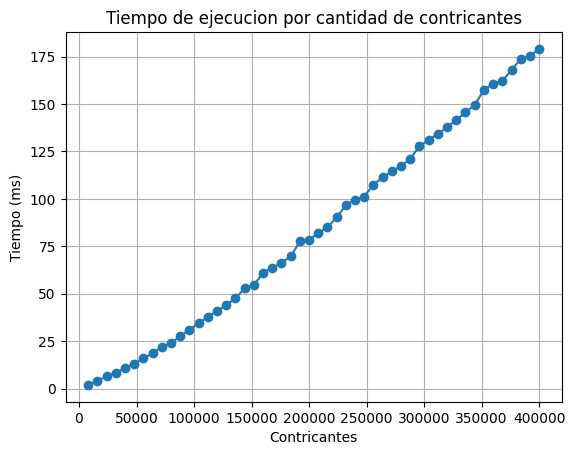

In [3]:
import matplotlib.pyplot as plt

contricantes = [analisis[0] for analisis in resultado]
tiempos = [analisis[1] for analisis in resultado]

plt.plot(contricantes, tiempos, label= "Tiempo segun cantidad de contricantes",  marker='o', linestyle='-')
plt.xlabel('Contricantes')
plt.ylabel('Tiempo (ms)')
plt.title('Tiempo de ejecucion por cantidad de contricantes')
plt.grid(True)

plt.show()

In [4]:
for i in range(1, len(resultado) -1):
    medida_anterior = resultado[i-1][1]
    medida = resultado[i][1]
    medida_siguiente = resultado[i+1][1]

    medida_aproximada = (medida_anterior + medida_siguiente)/2
    resultado[i] = (resultado[i][0], round(medida_aproximada, 2))
    print(f"Suavizando resultado {resultado[i][0]}, {medida} a {medida_aproximada}")
print(resultado)

Suavizando resultado 16000, 4.07 a 4.135
Suavizando resultado 24000, 6.36 a 6.234999999999999
Suavizando resultado 32000, 8.34 a 8.58
Suavizando resultado 40000, 10.93 a 10.835
Suavizando resultado 48000, 13.09 a 13.344999999999999
Suavizando resultado 56000, 15.85 a 15.975
Suavizando resultado 64000, 18.61 a 18.98
Suavizando resultado 72000, 21.99 a 21.515
Suavizando resultado 80000, 24.05 a 24.509999999999998
Suavizando resultado 88000, 27.5 a 27.810000000000002
Suavizando resultado 96000, 31.11 a 31.089999999999996
Suavizando resultado 104000, 34.37 a 34.445
Suavizando resultado 112000, 37.8 a 37.55
Suavizando resultado 120000, 40.65 a 40.864999999999995
Suavizando resultado 128000, 44.18 a 44.19
Suavizando resultado 136000, 47.52 a 48.57
Suavizando resultado 144000, 52.95 a 51.47
Suavizando resultado 152000, 54.37 a 56.29
Suavizando resultado 160000, 61.11 a 60.004999999999995
Suavizando resultado 168000, 63.72 a 63.1
Suavizando resultado 176000, 66.2 a 66.365
Suavizando resultado 

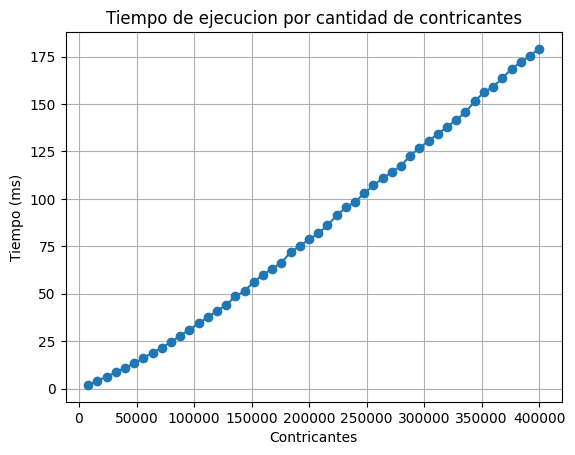

In [5]:
contricantes = [analisis[0] for analisis in resultado]
tiempos = [analisis[1] for analisis in resultado]

plt.plot(contricantes, tiempos, label= "Tiempo segun cantidad de contricantes",  marker='o', linestyle='-')
plt.xlabel('Contricantes')
plt.ylabel('Tiempo (ms)')
plt.title('Tiempo de ejecucion por cantidad de contricantes')
plt.grid(True)

plt.show()